# PBL 2 Dynamic System

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Box 1 (Intestinal Lining)

In the dynamic system, stream 1 thiamine is expected to be a static value less than the baseline of 0.0012 g/day. Thus, it can be modeled by multiplying the baseline value by a factor less than 1. Since no accumulation occurs in this box, the flow rates of all other streams are also scaled by this factor.

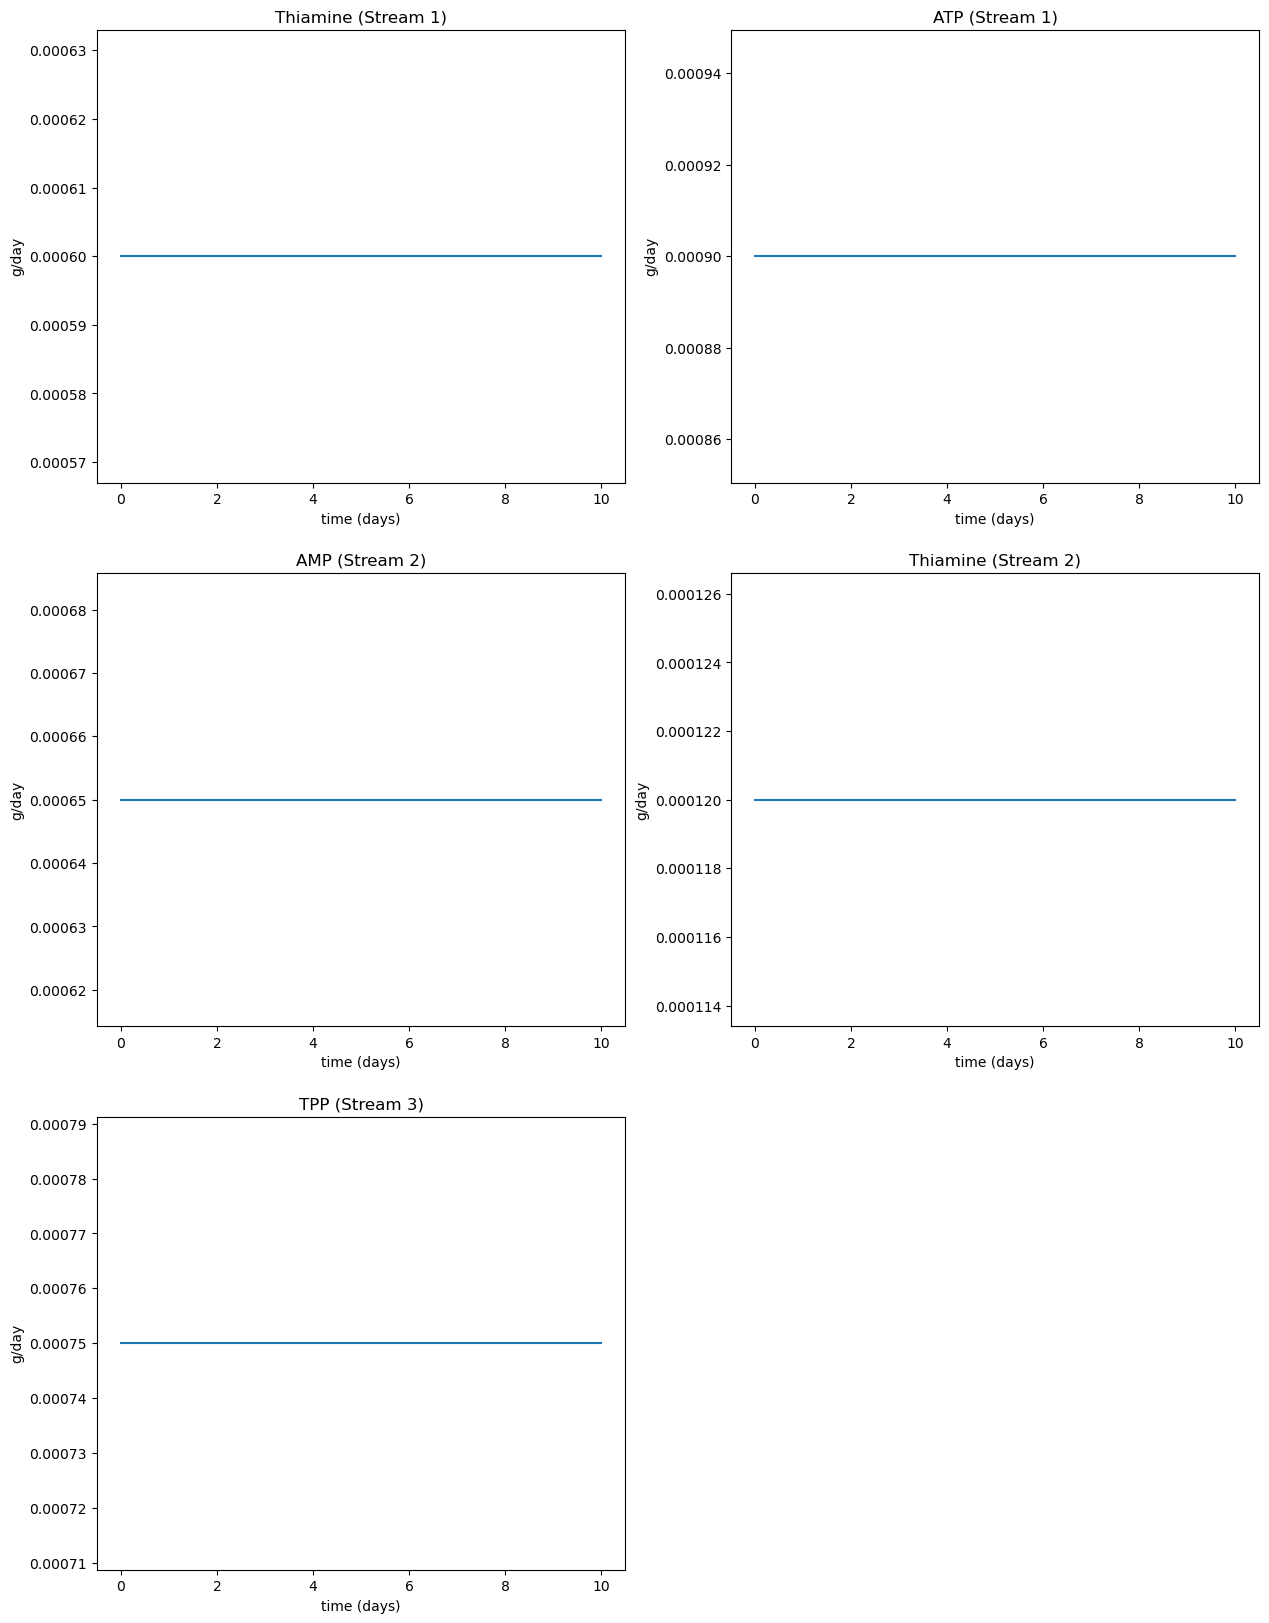

In [2]:
def createConstantArray(value, length):
    """Creates array with the same value repeated at every index"""
    return [value]*length

# Baseline stream flow rates

thiamine1 = 0.0012
atp1 = 0.0018
thiamine2 = 0.00024
amp2 = 0.0013
tpp3 = 0.0015

# Set a factor and multiply all baseline flow rates by it

factor = 0.5

thiamine1 = 0.0012*factor
atp1 = 0.0018*factor
thiamine2 = 0.00024*factor
amp2 = 0.0013*factor
tpp3 = 0.0015*factor

# Creating time array

period = 10 # 10 day period
t = np.linspace(0, period, 1000)

# Plotting new flow rates

thiamine1 = createConstantArray(thiamine1, len(t))
atp1 = createConstantArray(atp1, len(t))
thiamine2 = createConstantArray(thiamine2, len(t))
amp2 = createConstantArray(amp2, len(t))
tpp3 = createConstantArray(tpp3, len(t))


fig1 = plt.figure()
fig1.set_size_inches(15, 20, forward=True)

ax1 = fig1.add_subplot(3, 2, 1)
ax1.set_title("Thiamine (Stream 1)")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('g/day')
ax1.plot(t, thiamine1)

ax2 = fig1.add_subplot(3, 2, 2)
ax2.set_title("ATP (Stream 1)")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('g/day')
ax2.plot(t, atp1)

ax3 = fig1.add_subplot(3, 2, 3)
ax3.set_title("AMP (Stream 2)")
ax3.set_xlabel('time (days)')
ax3.set_ylabel('g/day')
ax3.plot(t, amp2)

ax4 = fig1.add_subplot(3, 2, 4)
ax4.set_title("Thiamine (Stream 2)")
ax4.set_xlabel('time (days)')
ax4.set_ylabel('g/day')
ax4.plot(t, thiamine2)

ax5 = fig1.add_subplot(3, 2, 5)
ax5.set_title("TPP (Stream 3)")
ax5.set_xlabel('time (days)')
ax5.set_ylabel('g/day')
ax5.plot(t, tpp3)

Box 2 (Pyruvate Converter)

For the keto diet, the pyruvate intake (stream 4) is less than its baseline rate of 34.8 g/day. From Morgan's source, 20 g/day of carbs is recommended for a keto diet. Since carbs are just polymers of glucose, there is a 100% conversion from carbs to glucose.

1 mol of glucose produces 2 mol of pyruate, so 180.156 g of glucose produces 176.12 g of pyruvate using their molar masses. This is a conversion rate of 97.76%. 

Result: The pyruvate intake (stream 4) for a keto diet is 19.6 g/day.

Unlike the static thiamine intake in stream 1, assume a person "eases" into the keto diet by decreasing their rate of pyruvate intake from the baseline of 34.8 g/day to 19.6 g/day over a period, say 10 days.

All other flow rates expect stream 5 TPP should scale down proportionally with stream 4 thiamine because the constituents form a 1:1 mol ratio with stream 4 thiamine. For example, if stream 4 thiamine is 90% of its baseline value of 34.8 g/day, then stream 5 acetyl-CoA should be 90% of its baseline value of 324 g/day. TPP is not consumed or produced in this reaction, so stream 5 TPP = stream 3 TPP.

In [3]:
def linearDecrease(ystart, yend, period, time):
    """Creates a linearly decreasing array"""
    return [(yend-ystart)/period*t + ystart for t in time]

def quadraticDecrease(ystart, yend, period, time):
    """Creates a quadratically decreasing array"""
    a = (ystart-yend)/(period**2)
    return [a*((t-period)**2) + yend for t in time]

def zeroPadding(array, length):
    """Adds zeros to an array to a desired total length"""
    if len(array) > length:
        return array
    numZeros = length - len(array)
    for i in range(numZeros):
        array.append(0)
    return array
    

# Declaring pyruvate intake at the start and end of period

pyruvate_start = 34.8
pyruvate_end = 3.91

# Creating pyruvate flow rate array

KETOACIDOSIS = 0   # CHANGE TO 0 IF NOT KETOACIDOSIS

if KETOACIDOSIS == 1:
    
    pyruvate_period = 3 # 3 day period
    t_pyruvate = np.linspace(0, pyruvate_period, 1000 // pyruvate_period)
    
else:
    
    pyruvate_period = period
    t_pyruvate = t


# pyruvate4 = linearDecrease(pyruvate_start, pyruvate_end, period, t)
pyruvate4 = quadraticDecrease(pyruvate_start, pyruvate_end, pyruvate_period, t_pyruvate)

if KETOACIDOSIS == 1:
    pyruvate4 = zeroPadding(pyruvate4, len(t))


# Creating factor array (pyruvate4 / pyruvate_start for every time point)

factorArray = np.zeros(len(pyruvate4))
    
for i in range(len(pyruvate4)):
    factorArray[i] = pyruvate4[i]/pyruvate_start

# Baseline stream flow rates

aCoA5 = 324
CoA11 = 306.8
co213 = 17.6

# Create constant arrays

aCoA5 = createConstantArray(aCoA5, len(t))
CoA11 = createConstantArray(CoA11, len(t))
co213 = createConstantArray(co213, len(t))

# Multiply by factorArray

aCoA5 = np.multiply(aCoA5, factorArray)
CoA11 = np.multiply(CoA11, factorArray)
co213 = np.multiply(co213, factorArray)

# Creating tpp5 array

tpp5 = tpp3

# Plotting new flow rates

fig2 = plt.figure()
fig2.set_size_inches(15, 20, forward=True)

ax1 = fig2.add_subplot(3, 2, 1)
ax1.set_title("Pyruvate (Stream 4)")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('g/day')
ax1.plot(t, pyruvate4)

ax2 = fig2.add_subplot(3, 2, 2)
ax2.set_title("Acetyl-CoA (Stream 5)")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('g/day')
ax2.plot(t, aCoA5)

ax3 = fig2.add_subplot(3, 2, 3)
ax3.set_title("CoA (Stream 11)")
ax3.set_xlabel('time (days)')
ax3.set_ylabel('g/day')
ax3.plot(t, CoA11)

ax4 = fig2.add_subplot(3, 2, 4)
ax4.set_title("CO2 (Stream 13)")
ax4.set_xlabel('time (days)')
ax4.set_ylabel('g/day')
ax4.plot(t, co213)

ax5 = fig2.add_subplot(3, 2, 5)
ax5.set_title("TPP (Stream 3)")
ax5.set_xlabel('time (days)')
ax5.set_ylabel('g/day')
ax5.plot(t, tpp3)

ax6 = fig2.add_subplot(3, 2, 6)
ax6.set_title("TPP (Stream 5)")
ax6.set_xlabel('time (days)')
ax6.set_ylabel('g/day')
ax6.plot(t, tpp5)


Box 3 Modified (Energy)

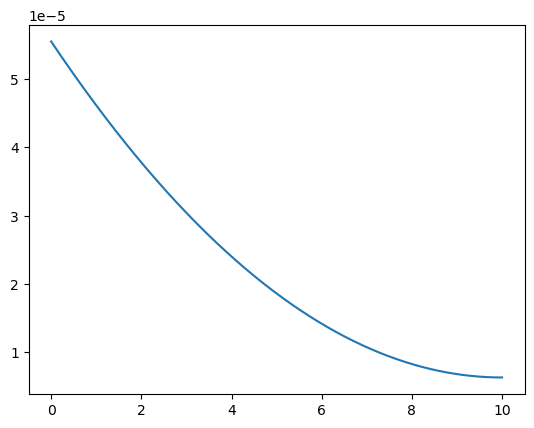

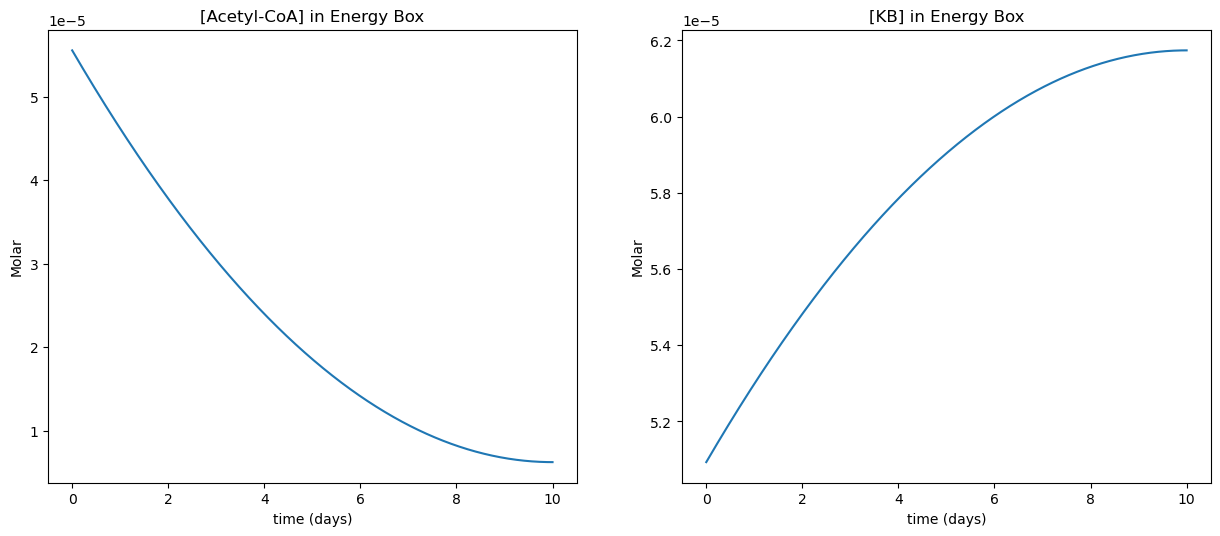

In [13]:
# Burning acetyl-CoA

    # d[ATP]/dt = k1[aCoA][tpp]
    # d (moles of ATP out) / dt = above * volume (5L?)
    
# Burning KB

    # d[ATP]/dt = k2[KB]
    # d [moles of ATP out] / dt = above * volume

volume = 5 # Energy box is 5L

aCoA_0 = 55.6*10**-6 # initial concentration of aCoA in energy box
KB_0 = 0.03*10**-3 # initial concentration of KB in energy box
tpp_0 = 4.903*10**-10 # initial concentration of tpp in energy box

totalATPRate = 5068.1

k1 = 1.93 / aCoA_0 / tpp_0 / volume # rate constant for acetyl-CoA pathway
k2 = 1.18 / (0.03 * 10**-3) / volume # rate constant for KB pathway

bloodFlowRate = 7200 # 7200 L/day

# Calculating how ATP produced from acetyl-CoA evolves with time

# We need to figure out how the aCoA concentration in energy box changes with time

    # mole flow rate / bloodFlowRate
    
# massFlowRateKB9baseline = 22.3 # 22.3 g/day

molarMassACoA = 810 
molarMassTPP = 425
molarMassKB = 103 
molarMassATP = 507
    
aCoA_energybox = np.zeros(len(t))
for i in range(len(t)):
    aCoA_energybox = aCoA5 / molarMassACoA / bloodFlowRate
    
# plt.plot(t, aCoA_energybox)

# TPP concentration is energy box is constant - tpp_0

# Now we can determine d[ATP]/dt from burning acetyl-CoA

atpFromStream5 = np.zeros(len(t))
for i in range(len(t)):
    atpFromStream5[i] = k1*aCoA_energybox[i]*tpp_0*molarMassATP*volume
    
# plt.plot(t, atpFromStream5)

# We can now determine ATP rate from burning KB

atpFromStream9 = [totalATPRate - x for x in atpFromStream5]

# plt.plot(t, atpFromStream9)

# Using this and the fact that 1 mol KB -> 22 mol ATP, calculate KB9

atpFromStream9Moles = [x / molarMassATP for x in atpFromStream9]
KB9 = [x / 22 * molarMassKB for x in atpFromStream9Moles]

# plt.plot(t, KB9)

# Using KB9, we can determine how the concentration of KB in the energy box evolves with time

KB_energybox = [x / molarMassKB / bloodFlowRate for x in KB9]


# Lets plot how the concentration of KB and acetyl-CoA change with time in the energy box

figEnergy = plt.figure()
figEnergy.set_size_inches(15, 20, forward=True)

ax1 = figEnergy.add_subplot(3, 2, 1)
ax1.set_title("[Acetyl-CoA] in Energy Box")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('Molar')
ax1.plot(t, aCoA_energybox)

ax2 = figEnergy.add_subplot(3, 2, 2)
ax2.set_title("[KB] in Energy Box")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('Molar')
ax2.plot(t, KB_energybox)

Box 3 (Energy)

***IGNORE THIS DESCRIPTION***

In this model, there are two sources of ATP coming out of the energy box - the breakdown of acetyl-CoA (stream 5) and breakdown of KB (stream 9). 

For the breakdown of acetyl-CoA into energy, assume that d[ATP]/dt = k1*(ACoA5)*(tpp5). We know that for normal conditions, d[ATP]dt = 3043 g/day, ACoA5 = 324 g/day, and tpp5 = 0.0015 g/day. Then, k1 = 6261 (g/day)^-1. 

For the breakdown of KB, assume that d[ATP]/dt = k2*(KB9). We know that for normal conditions, d[ATP]/dt = 2025.1 g/day and KB9 = 22.3 g/day. Then, k2 = 90.8.

For the normal condition, ATP production from burning acetyl-CoA and KB sums to 5068.1 g/day. When a keto diet is introduced, the ATP originating from acetyl-CoA is reduced. Assume that stream 9 KB increases so that the body always produces 5068.1 g/day of ATP from these 2 pathways combined.

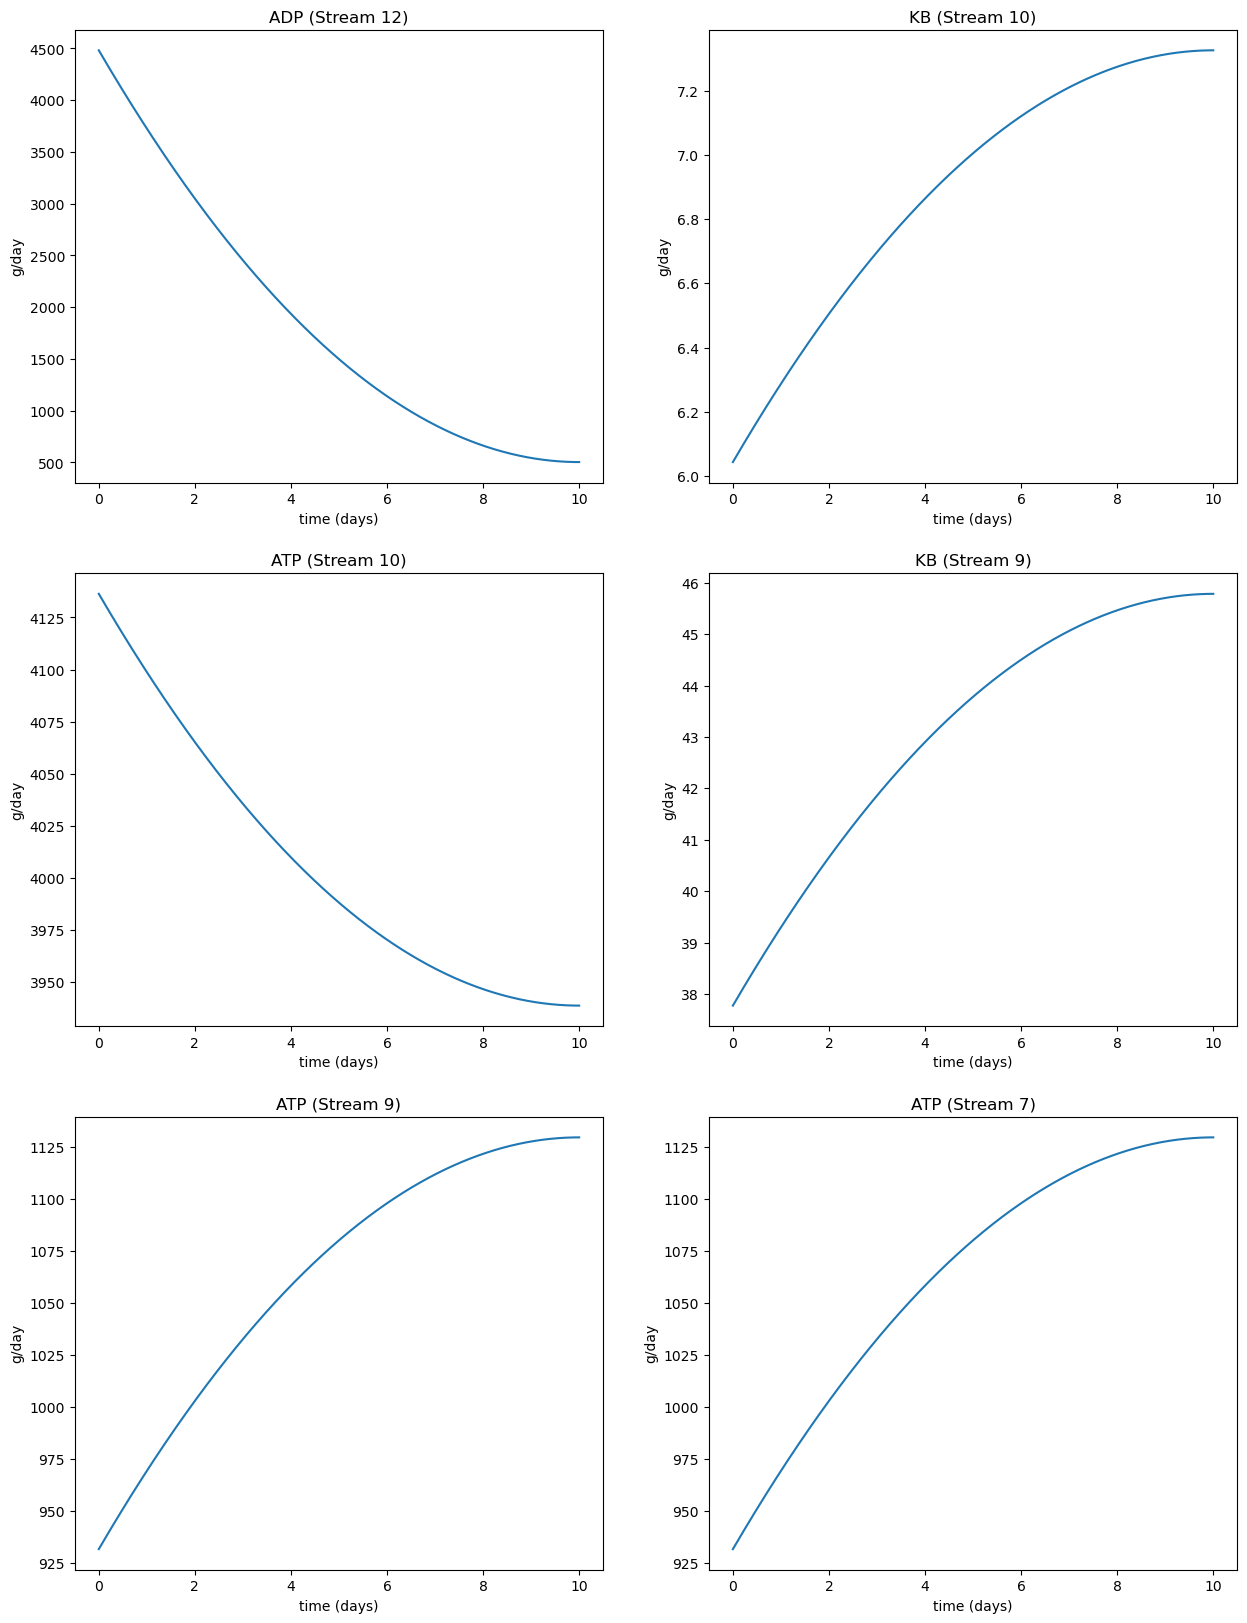

In [5]:
# Calculate rate of ATP production from burning stream 5 components

# atpFromStream5 = np.zeros(len(t))

# k1 = 6261
# for i in range(len(t)):
#     atpFromStream5[i] = k1*aCoA5[i]*tpp5[i]
    
# # Calculate rate of ATP production from burning KB in stream 9

# totalATPRate = 5068.1

# atpFromStream9 = np.zeros(len(t))

# for i in range(len(t)):
#     atpFromStream9[i] = totalATPRate - atpFromStream5[i]

# # plt.plot(t, atpFromStream5)
# # plt.plot(t, atpFromStream9)

# # Now we can find how KB9 evolves with time

# KB9 = np.zeros(len(t))

# k2 = 90.8
# for i in range(len(t)):
#     KB9[i] = atpFromStream9[i]/k2
    
# # plt.plot(t, KB9)

# ADP12 is a component of the pathway burning acetyl-CoA to ATP, so ADP12 changes proportionally to aCoA5

adp12 = 4482 # baseline value
adp12 = createConstantArray(adp12, len(t))
adp12 = np.multiply(adp12, factorArray)

# plt.plot(t, adp12)

# We know that 16% of the KB from stream 9 is not metabolized and goes into stream 10

KB10 = np.zeros(len(t))

wasteFactor = 0.16
for i in range(len(t)):
    KB10[i] = KB9[i]*wasteFactor
    
# plt.plot(t, KB10)

# Assume that the body keeps ATP9 / KB9 a constant ratio. Calculate how atp9 evolves with time. This is the same as atp7

ratio = 550.1/22.3 # from normal condition

atp9 = np.zeros(len(t))

for i in range(len(t)):
    atp9[i] = KB9[i]*ratio

atp7 = atp9

# atp10 is the total ATP produced - atp7

atp10 = np.zeros(len(t))

for i in range(len(t)):
    atp10[i] = totalATPRate - atp7[i]

# plt.plot(t, atp10)
    
# Plotting everything

fig3 = plt.figure()
fig3.set_size_inches(15, 20, forward=True)

ax1 = fig3.add_subplot(3, 2, 1)
ax1.set_title("ADP (Stream 12)")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('g/day')
ax1.plot(t, adp12)

ax2 = fig3.add_subplot(3, 2, 2)
ax2.set_title("KB (Stream 10)")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('g/day')
ax2.plot(t, KB10)

ax3 = fig3.add_subplot(3, 2, 3)
ax3.set_title("ATP (Stream 10)")
ax3.set_xlabel('time (days)')
ax3.set_ylabel('g/day')
ax3.plot(t, atp10)

ax4 = fig3.add_subplot(3, 2, 4)
ax4.set_title("KB (Stream 9)")
ax4.set_xlabel('time (days)')
ax4.set_ylabel('g/day')
ax4.plot(t, KB9)

ax5 = fig3.add_subplot(3, 2, 5)
ax5.set_title("ATP (Stream 9)")
ax5.set_xlabel('time (days)')
ax5.set_ylabel('g/day')
ax5.plot(t, atp9)

ax6 = fig3.add_subplot(3, 2, 6)
ax6.set_title("ATP (Stream 7)")
ax6.set_xlabel('time (days)')
ax6.set_ylabel('g/day')
ax6.plot(t, atp7)



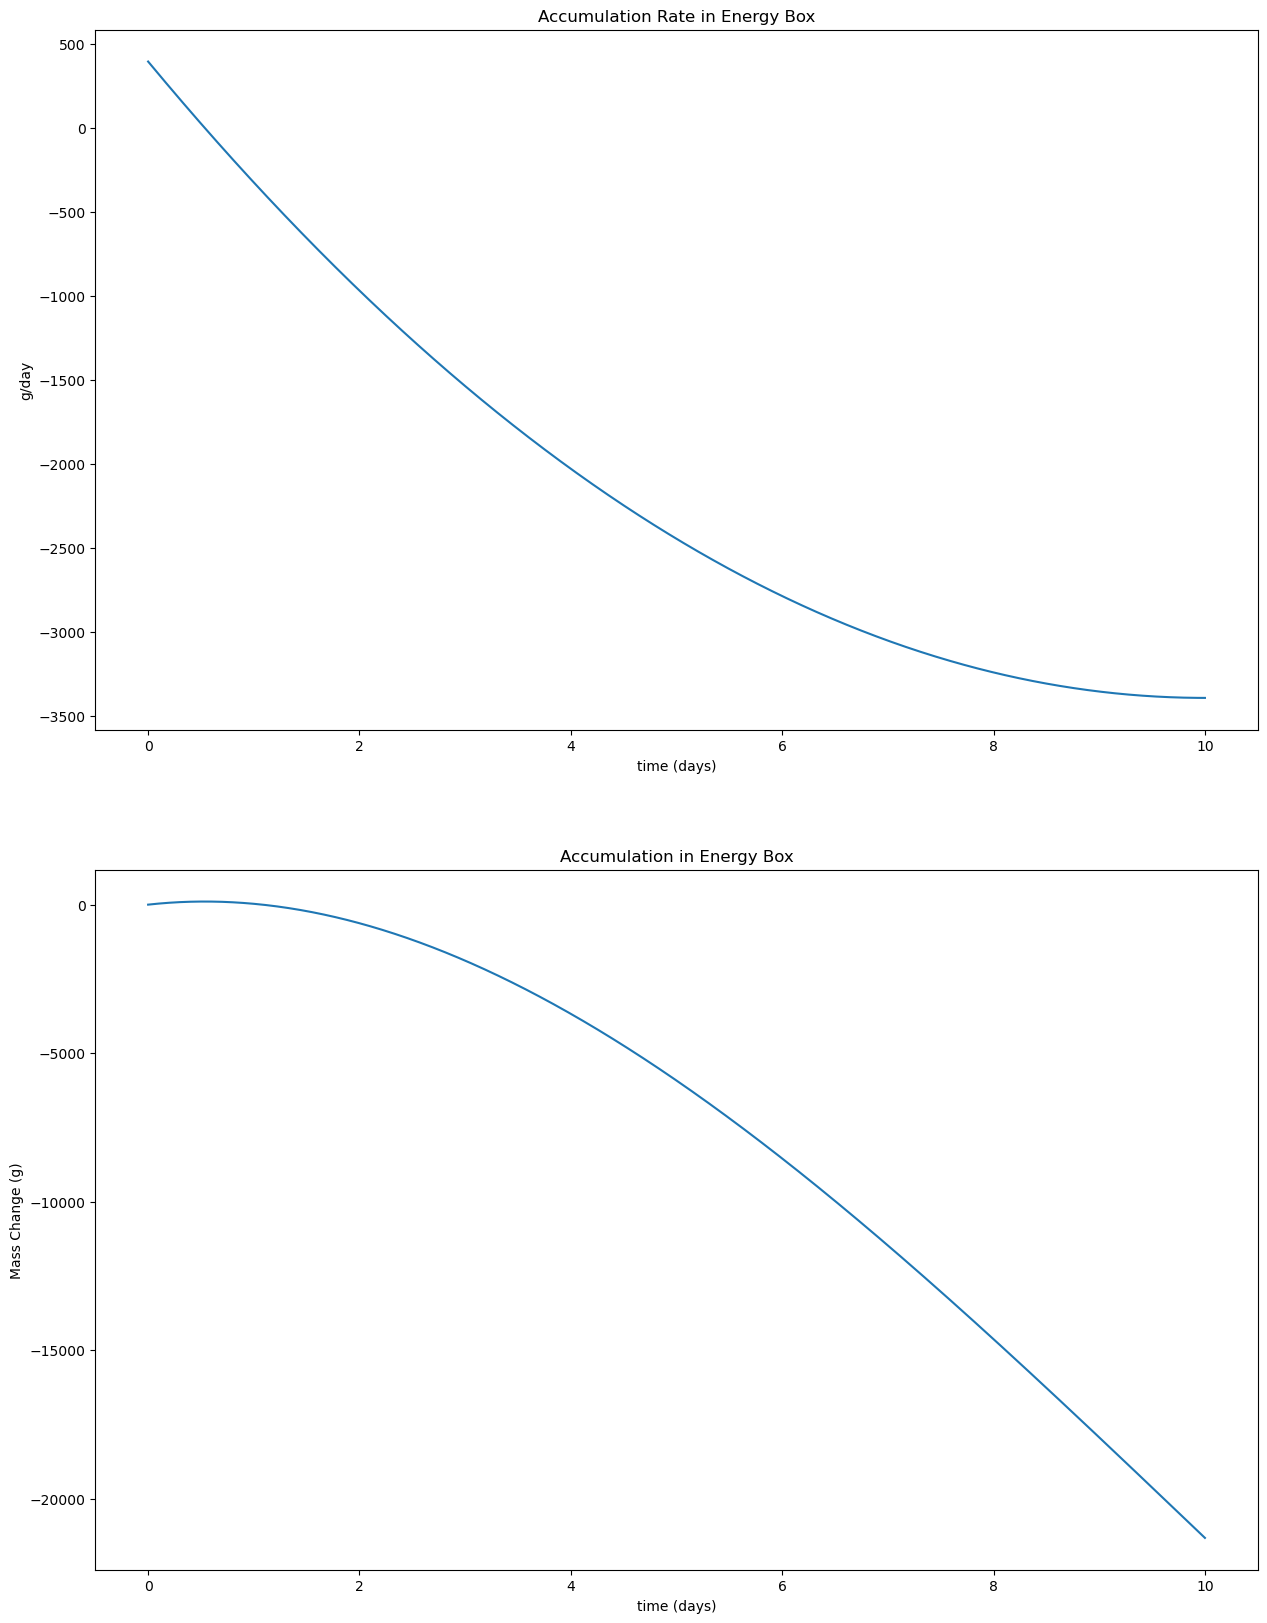

In [6]:
# Accumulation rate in energy box (in - out)

# acc = adp12 + KB9 + atp9 + aCoA5 - CoA11 - atp7 - KB10 - atp10

acc = [a + b + c + d - e - f - g - h for a, b, c, d, e, f, g, h in zip(adp12, KB9, atp9, aCoA5, CoA11, atp7, KB10, atp10)]

# Write linear equation describing acc, a function of time

# y = (acc[-1] - acc[0])*t/period + acc[0]

# if instead a quadratic decrease was used, a quadratic equation for acc must be written

# y = a*(t-period)^2 + acc[-1]
# a = (acc[0]-acc[-1])/period^2

# integrate acc

y0 = [0]

slope = (acc[-1] - acc[0])/period
b = acc[0]

a = (acc[0] - acc[-1]) / (period**2)

def odefunc(y0, t):
    
    A = y0

#     dAdt = (slope*t + b) # for linear rate of accumulation
    dAdt = a*((t-period)**2) + acc[-1] # for quadratic rate of accumulation
    
    return [dAdt]

y, info = odeint(odefunc, y0, t, full_output = True)

# Plotting accumulation rate and accumulation

fig4 = plt.figure()
fig4.set_size_inches(15, 20, forward=True)

ax1 = fig4.add_subplot(2, 1, 1)
ax1.set_title("Accumulation Rate in Energy Box")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('g/day')
ax1.plot(t, acc)

ax2 = fig4.add_subplot(2, 1, 2)
ax2.set_title("Accumulation in Energy Box")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('Mass Change (g)')
ax2.plot(t, y)

Box 4 (KB Production)

An assumption is made that this box is steady-state even when the entire system is dynamic, so no accumulation will occur here. All streams are proportional to KB9

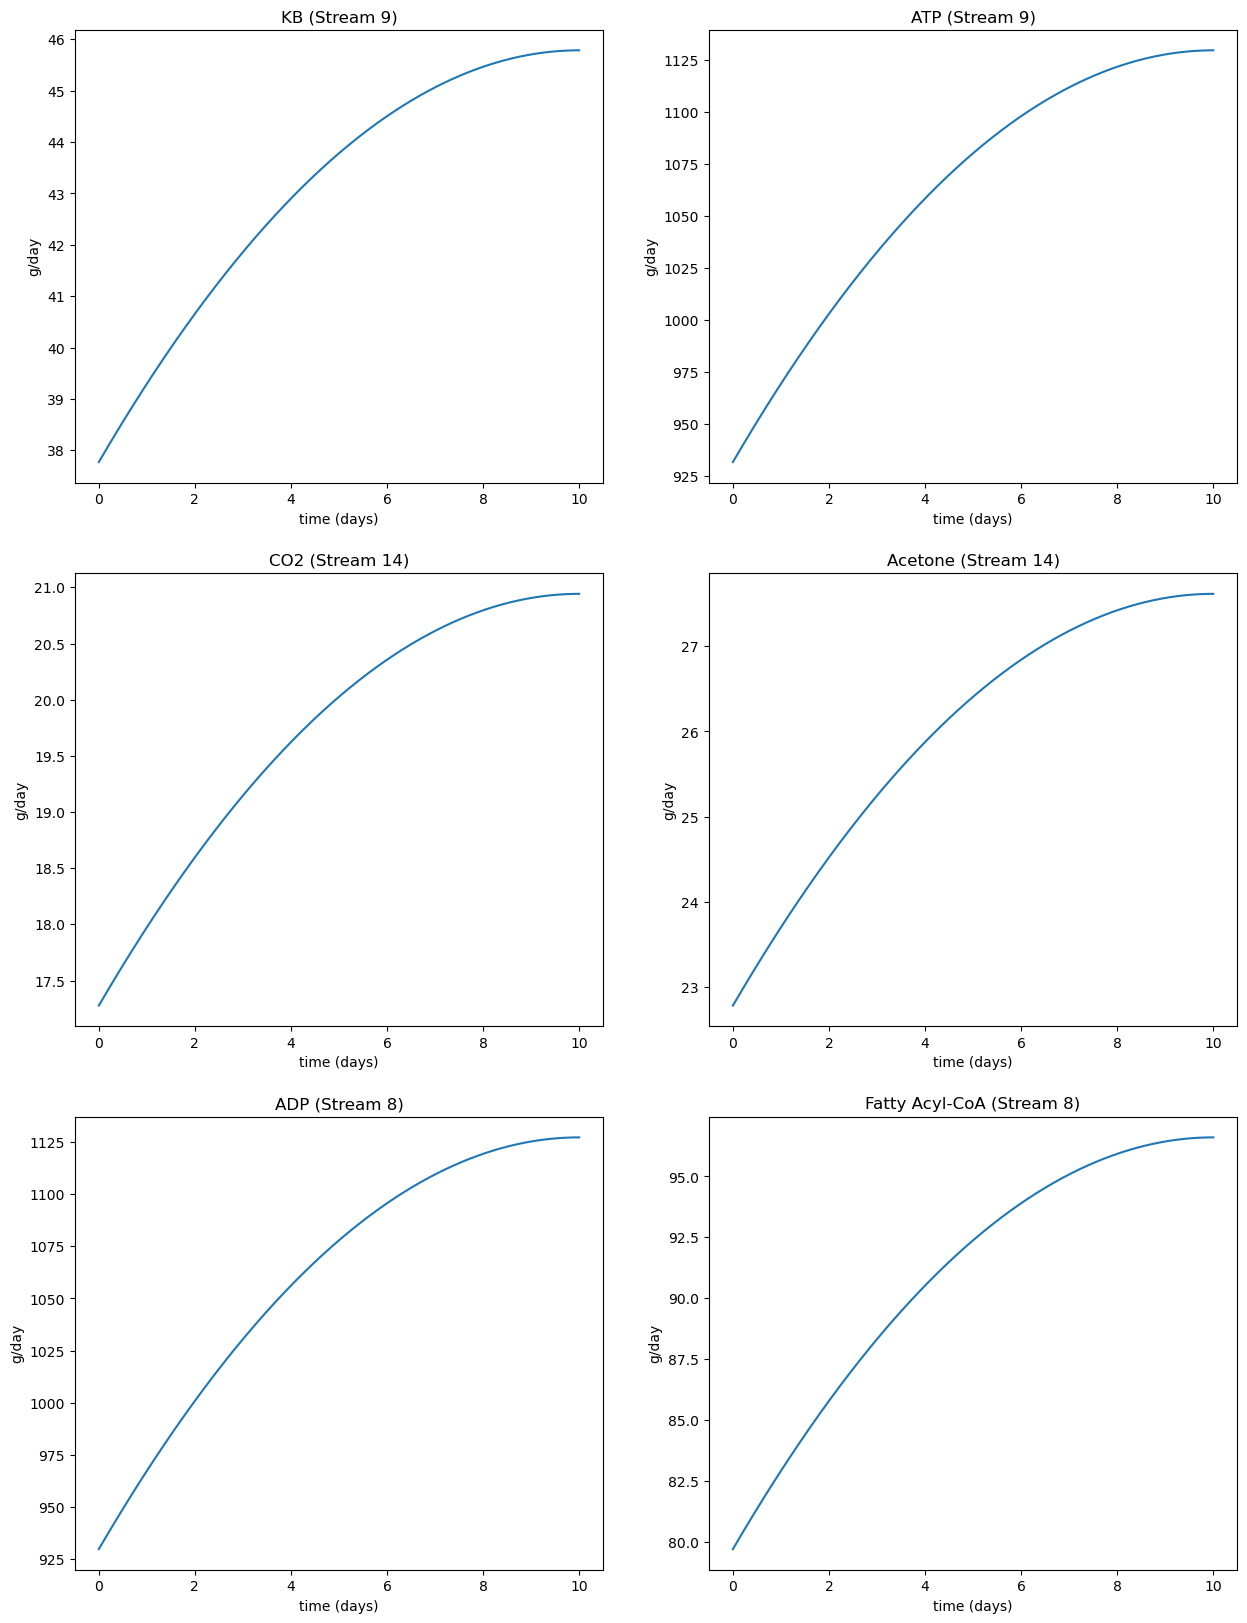

In [7]:
# Baseline stream flow rates

adp8 = 549
faCoA8 = 47.05
co214 = 10.2
acetone14 = 13.45

# Creating flow arrays

adp8 = createConstantArray(adp8, len(t))
faCoA8 = createConstantArray(faCoA8, len(t))
co214 = createConstantArray(co214, len(t))
acetone14 = createConstantArray(acetone14, len(t))

# Modifying flow arrays so that they change according to KB9

factorArrayKB9 = np.zeros(len(t))

for i in range(len(t)):
    factorArrayKB9[i] = KB9[i]/22.3
    
adp8 = np.multiply(adp8, factorArrayKB9)
faCoA8 = np.multiply(faCoA8, factorArrayKB9)
co214 = np.multiply(co214, factorArrayKB9)
acetone14 = np.multiply(acetone14, factorArrayKB9)

fig5 = plt.figure()
fig5.set_size_inches(15, 20, forward=True)

ax1 = fig5.add_subplot(3, 2, 1)
ax1.set_title("KB (Stream 9)")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('g/day')
ax1.plot(t, KB9)

ax2 = fig5.add_subplot(3, 2, 2)
ax2.set_title("ATP (Stream 9)")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('g/day')
ax2.plot(t, atp9)

ax3 = fig5.add_subplot(3, 2, 3)
ax3.set_title("CO2 (Stream 14)")
ax3.set_xlabel('time (days)')
ax3.set_ylabel('g/day')
ax3.plot(t, co214)

ax4 = fig5.add_subplot(3, 2, 4)
ax4.set_title("Acetone (Stream 14)")
ax4.set_xlabel('time (days)')
ax4.set_ylabel('g/day')
ax4.plot(t, acetone14)

ax5 = fig5.add_subplot(3, 2, 5)
ax5.set_title("ADP (Stream 8)")
ax5.set_xlabel('time (days)')
ax5.set_ylabel('g/day')
ax5.plot(t, adp8)

ax6 = fig5.add_subplot(3, 2, 6)
ax6.set_title("Fatty Acyl-CoA (Stream 8)")
ax6.set_xlabel('time (days)')
ax6.set_ylabel('g/day')
ax6.plot(t, faCoA8)

Box 5 (Long Term)

Due to the keto diet, the outlet streams of the Long Term box are increased so that more ketone bodies can be produced. The rate of replenishing fatty acids (stream 6) was assumed to be constant. As a result, the mass inside this box will decrease as more fatty acids are consumed than is replenished as the keto diet intensifies.  

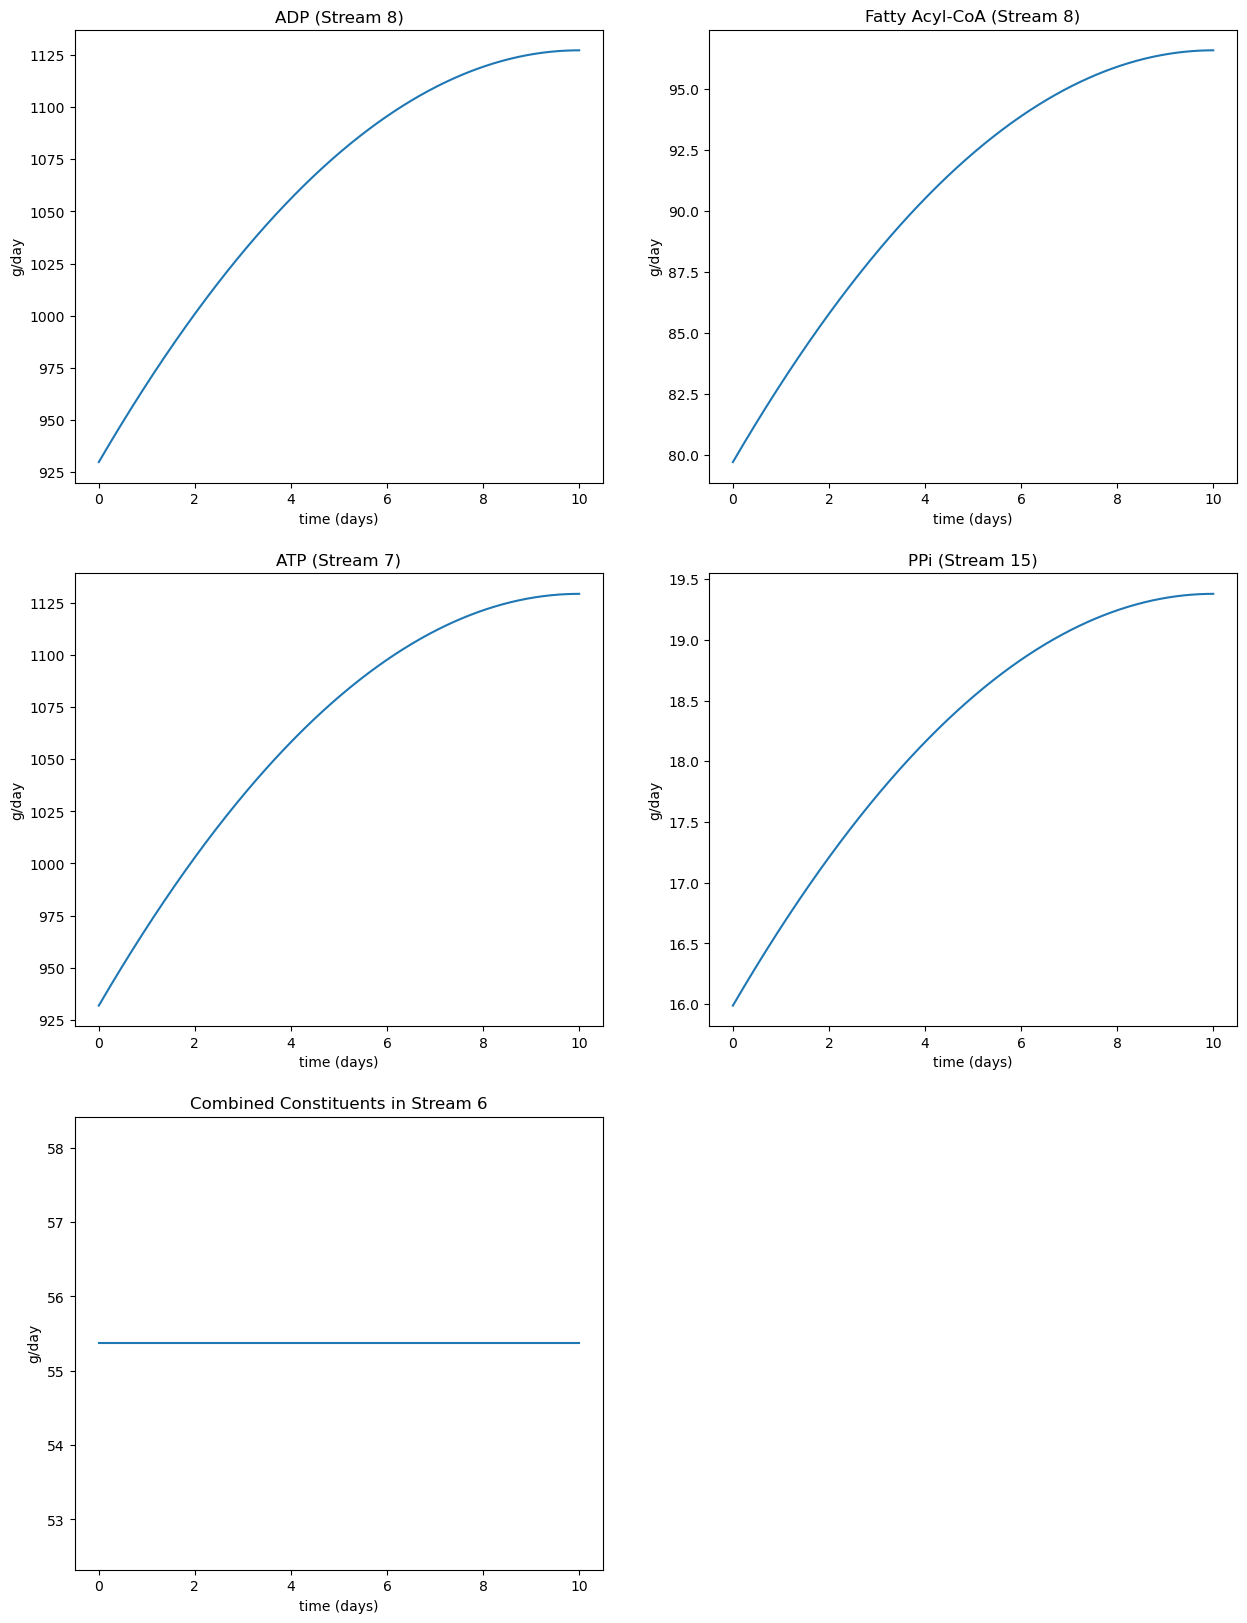

In [8]:
# Stream 15 is proportional to stream 7 as PPi is the result of hydrolysis of one ATP molecule

ratio15to8 = 9.42/549 # normal condition

# Calculating how stream 15 evolves over time

ppi15 = np.zeros(len(t))

for i in range(len(t)):
    ppi15[i] = atp7[i]*ratio15to8
    
# Stream 6 is constant, combine the constituents into a single mass flow rate

stream6 = 13.86 + 41.51

stream6 = [stream6] * len(t)

# Plotting 

fig6 = plt.figure()
fig6.set_size_inches(15, 20, forward=True)

ax1 = fig6.add_subplot(3, 2, 1)
ax1.set_title("ADP (Stream 8)")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('g/day')
ax1.plot(t, adp8)

ax2 = fig6.add_subplot(3, 2, 2)
ax2.set_title("Fatty Acyl-CoA (Stream 8)")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('g/day')
ax2.plot(t, faCoA8)

ax3 = fig6.add_subplot(3, 2, 3)
ax3.set_title("ATP (Stream 7)")
ax3.set_xlabel('time (days)')
ax3.set_ylabel('g/day')
ax3.plot(t, atp7)

ax4 = fig6.add_subplot(3, 2, 4)
ax4.set_title("PPi (Stream 15)")
ax4.set_xlabel('time (days)')
ax4.set_ylabel('g/day')
ax4.plot(t, ppi15)

ax5 = fig6.add_subplot(3, 2, 5)
ax5.set_title("Combined Constituents in Stream 6")
ax5.set_xlabel('time (days)')
ax5.set_ylabel('g/day')
ax5.plot(t, stream6)

In [9]:
# We now have all the streams calculated and can find rate of accumulation in Long Term box

# Accumulation rate in energy box (in - out)

# acc = stream6 + atp7 - ppi15 - adp8 - faCoA8

accLT = [a + b - c - d - e for a, b, c, d, e in zip(stream6, atp7, ppi15, adp8, faCoA8)]

# Write linear equation describing acc, a function of time

# y = (acc[-1] - acc[0])*t/period + acc[0]

# if instead a quadratic decrease was used, a quadratic equation for acc must be written

# y = a*(t-period)^2 + acc[-1]
# a = (acc[0]-acc[-1])/period^2

# integrate acc

aLT = (accLT[0] - accLT[-1]) / (period**2)

# y0LT = [10382] # 10900 grams of fatty acids normally
y0LT = [10900] # 10900 grams of fatty acids normally

slopeLT = (accLT[-1] - accLT[0])/period
bLT = accLT[0]

def odefuncLT(y0, t):
    
    A = y0

#     dAdt = (slopeLT*t + bLT) # for linear rate of accumulation
    dAdt = aLT*((t-period)**2) + accLT[-1] # for quadratic rate of accumulation
    
    return [dAdt]

yLT, info = odeint(odefuncLT, y0LT, t, full_output = True)

# Plotting accumulation rate and accumulation

fig7 = plt.figure()
fig7.set_size_inches(15, 20, forward=True)

ax1 = fig7.add_subplot(2, 1, 1)
ax1.set_title("Accumulation Rate in Long Term Box")
ax1.set_xlabel('time (days)')
ax1.set_ylabel('g/day')
ax1.plot(t, accLT)

ax2 = fig7.add_subplot(2, 1, 2)
ax2.set_title("Accumulation in Long Term Box")
ax2.set_xlabel('time (days)')
ax2.set_ylabel('Mass (g)')
ax2.plot(t, yLT)

In [10]:
# # Saving arrays

# np.savetxt('thiamine1keto', thiamine1)
# np.savetxt('pyruvate4keto', pyruvate4)

# np.savetxt('energyboxaccrateketo', acc)
# np.savetxt('energyboxaccketo', y)

# np.savetxt('KB9keto', KB9)

# np.savetxt('longtermboxaccrateketo', accLT)
# np.savetxt('longtermboxaccketo', yLT)

# np.savetxt('energyboxacoaconcketo', aCoA_energybox)
# np.savetxt('energyboxkbconcketo', KB_energybox)

np.savetxt('aCoA5keto', aCoA5)

In [11]:
# np.savetxt('thiamine1ketoacid', thiamine1)
# np.savetxt('pyruvate4ketoacid', pyruvate4)

# np.savetxt('energyboxaccrateketoacid', acc)
# np.savetxt('energyboxaccketoacid', y)

# np.savetxt('KB9ketoacid', KB9)

# np.savetxt('longtermboxaccrateketoacid', accLT)
# np.savetxt('longtermboxaccketoacid', yLT)

# np.savetxt('energyboxacoaconcketoacid', aCoA_energybox)
# np.savetxt('energyboxkbconcketoacid', KB_energybox)

# np.savetxt('aCoA5ketoacid', aCoA5)

In [12]:
print(k1)
print(k2)


14159588095381.334
7866.666666666666
